### Introduction:
The novel SARS-CoV-2 coronavirus that emerged in the city of Wuhan, China, last year and has since caused a large scale COVID-19 epidemic and spread to more than 70 other countries is the product of natural evolution, according to findings published today in the journal Nature Medicine. As of today, more than 800,000 people got infected and more than 40,000 fatality cases. It had a significant impact on the economies and businesses around the world. Therefore, it motivated many scientists and researchers to analyze this virus thoroughly to find a way that would cure it. Besides, many data scientists by analyzing data gathered by medical journals to find possible approaches that would decrease virus' spread. The most promising approach up to today is to quarantine the cities and persuading people to stay at home. In this project, we want to analyze data to understand what can we do to decrease the effect of this pandemic and find possible solutions to contain the spread and flatten the curve.  This data-set is a resource of over 45,000 scholarly articles, including over 33,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. This freely available dataset is provided to the global research community to apply recent advances in natural language processing and other AI techniques to generate new insights in support of the ongoing fight against this infectious disease.


## 1.Data cleaning
In this part, we first going to import necessary libraries. Data set might contain duplicate articles, therefore, we must remove those from our data frame. In addition, some of the rows might not contain values that are necessary for our analysis. Thus, it is important to detect them and remove them from the data frame. In the last step, we need to make all the characters in our data frame to lower case for further analysis.


In [1]:
%matplotlib inline
# Import dependencies
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff
from plotly import subplots
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from datetime import date
import math
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import os
import re
import string
from nltk.stem.porter import PorterStemmer
import scipy.cluster.hierarchy as shc
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram
# NLP libraries
import spacy
from spacy.lang.en import English
from nltk.tokenize import word_tokenize 
from collections import Counter
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from multiprocessing import cpu_count
import gensim.downloader as api
import re, string, unicodedata
from nltk.stem import LancasterStemmer, WordNetLemmatizer
#! python -m spacy download en_core_web_sm
import spacy
import en_core_web_sm


We have realized that not all of the data set directly related to coronavirus. For instance the article with the title of :Monitoring Data Quality in Syndromic Surveillance: Learnings from a Resource Limited Setting. Therefore, we have decided to focus on the publications that mention virus or infection of viruses and related words in their abstract. Since abstract is one of the important parts of the article that directly explain what is the whole purpose of the article.

Following code designed to clean the data and remove noise. It will remove noise from the data set

In [2]:

# load the meta data from the CSV file 
df=pd.read_csv('metadata.csv', usecols=['title','abstract','authors','doi','publish_time'])
print (df.shape)
df = df[df['abstract'].str.contains("covid-19") | df['abstract'].str.contains('covid 19')| df['abstract'].str.contains('novel coronavirus')| df['abstract'].str.contains('wuhan coronavirus')| df['abstract'].str.contains('wuhan')| df['abstract'].str.contains('sars-cov-2')| df['abstract'].str.contains('cord-19')| df['abstract'].str.contains('cord 19')| df['abstract'].str.contains('2019')| df['abstract'].str.contains(' coronavirus ')| df['abstract'].str.contains(' corona ')| df['abstract'].str.contains(' sars ')| df['abstract'].str.contains(' mers ')| df['abstract'].str.contains('respiratory tract infections')| df['abstract'].str.contains('orthocoronavirinae')| df['abstract'].str.contains('coronaviridae')| df['abstract'].str.contains('nidovirales')| df['abstract'].str.contains('riboviria')| df['abstract'].str.contains('riboviria')| df['abstract'].str.contains('transmission')| df['abstract'].str.contains('infectious')| df['abstract'].str.contains('infectious diseases')| df['abstract'].str.contains('outbreak')| df['abstract'].str.contains('virus')]
print(df.shape)
#drop duplicates
df = df.drop_duplicates(subset='abstract', keep="first")

#drop NANs 
df=df.dropna()

#show 10 lines of the new dataframe
print (df.shape)


(45774, 5)
(26582, 5)
(24540, 5)


In [3]:
# Removing single characters in the abstract
df['abstract']= df['abstract'].apply(lambda text: re.sub(r'\s+[a-zA-Z]\s+', ' ', text))
# Substituting multiple spaces with single space
df['abstract']= df['abstract'].apply(lambda text: re.sub(r'\s+', ' ', text, flags=re.I))
# Remove spaces \n
df['abstract']= df['abstract'].apply(lambda text: re.sub(r'\\n+', ' ', text, flags=re.I))

In [4]:
stop_words = pd.read_csv('stop_words.txt',header= None, prefix= 'stopwords')
stop_words_list = stop_words['stopwords0'].tolist()

In [5]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tokenized_abstract = df['abstract'].apply(lambda x: tokenization(x.lower()))

In [6]:
# remove stop words
def remove_stopwords(text):
    modified_word_list=[word for word in text if word not in stop_words_list]
    return modified_word_list

df['text_cleaned']=tokenized_abstract.apply(remove_stopwords)

Out of 45774 data set, around 24000 article directly mentioning coronavirus family and infectious viruses in their abstract. Thus, they will be the best target for us to investigate.

## 2. Data Visualization and Exploratory Data Analysis
In the first part of our analysis, we are going to look into the number of confirmed cases and the individuals who recovered from the virus to see how the pandemic started and when it was in the attention. We have found a data set related to COVID-19's spread through the world and we are going to use it as the new data set. This data set has been put in the submission file and it was downloaded from Kaggle and it has the data until March 31st 2020.
#### In this part we are going to provide important questions that we want to asnwer.

## 1. How COVID-19 spread through the world and why the numbers jumped significantly after mid-March?

In [7]:
spread = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
spread.head()

Province/State Country/Region      Lat     Long       Date  Confirmed  \
0            NaN    Afghanistan  33.0000  65.0000 2020-01-22          0   
1            NaN        Albania  41.1533  20.1683 2020-01-22          0   
2            NaN        Algeria  28.0339   1.6596 2020-01-22          0   
3            NaN        Andorra  42.5063   1.5218 2020-01-22          0   
4            NaN         Angola -11.2027  17.8739 2020-01-22          0   

   Deaths  Recovered  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0

In [8]:
# Defining Active Case: Active Case = confirmed - deaths - recovered
spread['Active'] = spread['Confirmed'] - spread['Deaths'] - spread['Recovered']

In [9]:
import plotly as py
import plotly.graph_objects as go
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)    #THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING

#Time Series plot for knwoing the spread

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=spread.Date,
                y=spread['Confirmed'],
                name="Confirmed",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=spread.Date,
                y=spread['Recovered'],
                name="Recovered",
                line_color='dimgray',
                opacity=0.8))
fig.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)
py.offline.iplot(fig)

We can see from the graph that up to Jan 30th there was not many of confirmed cases all around the globe. However, we know that the virus started in mid December 2019. Before the time not many countries pay attention to the matter and they did not have any measurements to control the virus. As of mid-March, when WHO announced the virus is a pandemic, countries started to pay more attention to the virus and even some countries such as Iran and Italy by then were struggling with COVID-19. As we can see, the number of confirmed cases increased significantly from March 26th. We can easily interpret that by then the virus but some infected many people might not show symptoms and some might treat it as a regular flue. However, when countries such as US started their free test for everybody, we realized many people were carrying the virus did not know about it. As we can see recovered curve is not that steep and as some health organizations announced it might take up to two weeks until the symptoms show up.

## 2. What countries are most involved with the pandemic and what caused the speed of spread in Europe?

In [10]:
# Renaming Mainland china as China in the data table
spread['Country/Region'] = spread['Country/Region'].replace('Mainland China', 'China')

# latest
full_latest = spread[spread['Date'] == max(spread['Date'])].reset_index()

# latest condensed
full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [11]:
temp = spread.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].max()

In [12]:
temp = spread.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')

In [13]:
temp_f = full_latest_grouped.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)

In the next cell, we want to look into the deaths until the last day of data set, meaning March 31st. We will use the globe heat map to show deaths in each region.

In [14]:
data_ps = spread.sort_values(by = ['Province/State','Date'], ascending=False)
filtered_data_ps = data_ps.drop_duplicates(subset = ['Province/State'],keep='first').reset_index()

data_cr = spread.sort_values(by = ['Country/Region','Date'], ascending=False)
filtered_data_cr = data_cr.drop_duplicates(subset = ['Country/Region'],keep='first').reset_index()

filtered_data_cr = filtered_data_cr.loc[~filtered_data_cr.Lat.isna()]
filtered_data_cr = filtered_data_cr.loc[~filtered_data_cr.Long.isna()]
filtered_data = pd.concat([filtered_data_cr, filtered_data_ps], axis=0).reset_index()

In [15]:
#!pip install folium
import folium
from folium.plugins import HeatMap, HeatMapWithTime
Heat_map = folium.Map(location=[0,0], zoom_start=2)
max_val = max(filtered_data['Deaths'])
HeatMap(data=filtered_data[['Lat', 'Long', 'Deaths']],\
        radius=15, max_zoom=12).add_to(Heat_map)
Heat_map

As we can see, China, US, Iran, Italy, Spain and France are among the countries that have the worst countries. It seems China was able to control the spread of virus after their immediate action. However, it took almost three months to handle the situation. European countries since they do not have strict borders around the countries before the shutdown, the virus spread rapidly. However, some European countries were able to better take control of virus and the death rate than others were. One of the most important reasons that Italy's death rate is very high is that they have a greater age average. However, these data are considered not to be quite accurate since some countries do not have enough tools for testing people of their own to check for the real infected numbers.

## 3. Does the speed of spread will reduce during the summer?

One of the main concern that people have is that what happens if temperature increases since we are approaching summer. Due to geography of earth, southern hemisphere is not in the summer time. For instance, countries such as Australia and New Zealand now experiencing the hot summer. In addition, there was a speculation that if the weather gets warmer, the spread of the virus would reduce its speed. Therefore, it is the best time to analyze whether this hypothesis is true or not. First, we need to access the average temperature data set. This data set includes the temperature for different countries during different times.

In [16]:
countries_temp = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

In [17]:
import plotly.offline as py
py.init_notebook_mode(connected=True)

## Removing the duplicates

average_temp_country_clear = countries_temp[~countries_temp['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

average_temp_country_clear = average_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Calculating average temperature by country

countries = np.unique(average_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(average_temp_country_clear[average_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())

# Building the data frame
    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

# Building the visual

layout = dict(
    title = 'GLOBAL AVERAGE LAND TEMPERATURES',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

As we can see, Sothern hemisphere countries usually experience higher temperatures than northern ones. Now, let us look into the global spread of the virus for further analysis.

In [18]:
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
formated_gdf = spread.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Progression of spread of COVID-19')
fig.update(layout_coloraxis_showscale=False)
py.offline.iplot(fig)

The above shown global map shows us that the virus started to spread in East Asia, specifically China. After a while, the speed increased in European countries and North America. However, the speed of virus is not as high in Southern hemisphere countries. This might be due to their average higher temperature. However, we cannot talk for sure. Since it is the first stage of global pandemic and some aspects of this virus is not known for many scientists. In my opinion, we cannot tell that increase of temperature would decrease the spread. Many of the African countries do not have enough equipment to publish their real numbers. In addition, we can see that countries such as Australia, which has an average temperature of 21 degree Celsius, is struggling with the pandemic. Therefore, it is very soon to accept the hypothesis about temperature.

## 4. What is the approximate death rate associated with COVID-19?

It would be interesting for us to take a look into the death rate for COVID-19. We are planning to calculate the death rate by dividing number of cases that del to fatality and total number of confirmed cases. This might be highly accurate since many of the confirmed cases have the possibility of fatality. However, it has the lowest error possible compared to other methods.

In [19]:
# Death rate analysis on global level
D_vs_R = spread.copy()
D_vs_R['Conf'] = 'Conf'
D_vs_R['DTH'] = 'DTH'
confirmed = pd.pivot_table(D_vs_R.dropna(subset=['Confirmed']), index='Date', 
                         columns='Conf', values='Confirmed', aggfunc=np.sum).fillna(method='ffill').reset_index()

death = pd.pivot_table(D_vs_R.dropna(subset=['Deaths']), index='Date', 
                         columns='DTH', values='Deaths', aggfunc=np.sum).fillna(method='ffill').reset_index()

D_vs_R_df = pd.merge(confirmed,death,on='Date')
D_vs_R_df['RATIO'] = D_vs_R_df['DTH'] / (D_vs_R_df['Conf'])*100

# ploting Current Deat Rate around the world
cur_ratio = D_vs_R_df[D_vs_R_df['Date'] == D_vs_R_df['Date'].max()]
fig_dr = go.Figure()
fig_dr.add_trace(go.Scatter(x=D_vs_R_df.Date, y=D_vs_R_df.RATIO, mode="lines+markers", line_color='Red', name = 'Current Death Rate' + ' ' + f"{int(cur_ratio['RATIO']):,d}%"))
fig_dr.update_layout(template="ggplot2",title_text = '<b>Death Rate % Around The World </b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans", color='black'), showlegend=True) 
fig_dr.update_layout(
    legend=dict(
        x=.65,
        y=0.95,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="Black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Red",
        borderwidth=2
    ))
fig_dr.show()

From the graph, it can be interpreted that death rate is increasing since mid-March with a very high speed. This is owing to the fact that number of confirmed cases is increasing and when people with critical health situation want to be hospitalized, most of the places are full and the demand is exceeding the capacity. This is the main reason that we want to flatten the curve in case of COVID-19.

## 5. What is the best measurments countries should take considering South Korea?

After the pandemic, some countries started to perform better than others in handling the chaos did. Therefore, it was necessary for us to look into the countries that were able to control the virus. First, we need to take a look to the data to understand which countries performed better than others. We want to take a look specifically on South Korea in this section.

In [20]:
spread_south_korea = spread.loc[spread['Country/Region'].isin(['South Korea'])]

In [21]:
covid_all = spread_south_korea[spread_south_korea['Date'] > '2020-01-22']

fig = make_subplots(rows=1, cols=3, subplot_titles=(f"{int(covid_all.Confirmed.max()):,d}" +' ' + "Confirmed",
                                                    f"{int(covid_all.Deaths.max()):,d}" +' ' + "Deaths",
                                                    f"{int(covid_all.Recovered.max()):,d}" +' ' + "Recovered"))

trace1 = go.Scatter(
                x=covid_all['Date'],
                y=covid_all['Confirmed'],
                name="Confirmed",
                line_color='orange',
                opacity=0.8)
trace2 = go.Scatter(
                x=covid_all['Date'],
                y=covid_all['Deaths'],
                name="DEATH",
                line_color='dimgray',
                opacity=0.8)

trace3 = go.Scatter(
                x=covid_all['Date'],
                y=covid_all['Recovered'],
                name="RECOVERED",
                line_color='deepskyblue',
                opacity=0.8)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.update_layout(template="ggplot2",title_text = '<b>Spread Vs. Death Vs Recovered In South Korea </b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'), showlegend=False)
fig.show()

In [22]:
# Death rate analysis on global level
D_vs_R = spread_south_korea.copy()
D_vs_R['Conf'] = 'Conf'
D_vs_R['DTH'] = 'DTH'
confirmed = pd.pivot_table(D_vs_R.dropna(subset=['Confirmed']), index='Date', 
                         columns='Conf', values='Confirmed', aggfunc=np.sum).fillna(method='ffill').reset_index()

death = pd.pivot_table(D_vs_R.dropna(subset=['Deaths']), index='Date', 
                         columns='DTH', values='Deaths', aggfunc=np.sum).fillna(method='ffill').reset_index()

D_vs_R_df = pd.merge(confirmed,death,on='Date')
D_vs_R_df['RATIO'] = D_vs_R_df['DTH'] / (D_vs_R_df['Conf'])*100

# ploting Current Deat Rate around the world
cur_ratio = D_vs_R_df[D_vs_R_df['Date'] == D_vs_R_df['Date'].max()]
fig_dr = go.Figure()
fig_dr.add_trace(go.Scatter(x=D_vs_R_df.Date, y=D_vs_R_df.RATIO, mode="lines+markers", line_color='Red', name = 'Current Death Rate' + ' ' + f"{int(cur_ratio['RATIO']):,d}%"))
fig_dr.update_layout(template="ggplot2",title_text = '<b>Death Rate % Around The World </b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans", color='black'), showlegend=True) 
fig_dr.update_layout(
    legend=dict(
        x=.65,
        y=0.95,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="Black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Red",
        borderwidth=2
    ))
fig_dr.show()

As of March 10th, South Korean government was able to reduce spread's speed significantly and the slope is much lower than before. Similarly, slope of recoveries is also increasing. On the other hand, Slope of death rate is not that high. Therefore, they were able to control the virus quite well. Now, we need to start focusing on the methods that they have implemented to control the pandemic. In addition, we can see that their death rate is much lower than the whole world with about 1.8 percent death rate. Therefore, it will motivate us to take a look into their regulation. We have found another data set from Kaggle, which represent the description of measure implemented by time. This would give us good understanding what measures other countries should implement to control the spread of COVID-19.

In [23]:
implemented=pd.read_csv('Measures.csv')
measures_south_korea = implemented.loc[implemented['Country'].isin(['South Korea'])]

We are going to use word cloud to find the key words which were repeated more often.

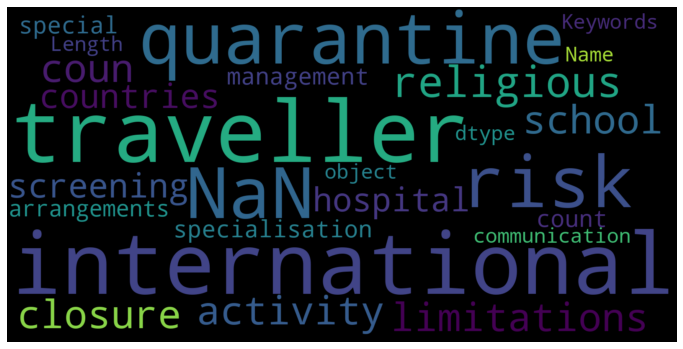

In [24]:
from wordcloud import WordCloud
text = str(measures_south_korea['Keywords'])
wordcloud = WordCloud(width = 1600,height = 800, max_font_size  = 400).generate(text)
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can see quarantine, traveler and international were among the most repeated words. It mean they have started the screening on the airports for international travelers. School and University closures were among the most important measures that were taken in the first place. In addition, they have increased hospital testing and used quarantine to address the issue of spread. Besides, they have limited the activities. Therefore, countries in the first stage of the spread need to increase their monitoring on the airports. Increase hospital testing for COVID-19 and close public places such as universities and schools were the risk of contagious is higher than other places. In addition, quarantining the city will reduce the speed of spread if all of the residents cooperate with the measurements.

## 6. What are the symptoms of Coronavirus?

In the next part of the project, we will look into the original data set which was provided by the instructors of the course. First, we will take a sub set of data which is related to COVID-19. Data frame contains all the coronavirus family but in the first stage of our work, we want to focus on the symptoms that are mentioned in recent articles about COVID-19.

In [25]:
covid = df[df['abstract'].str.contains("covid-19") | df['abstract'].str.contains('covid 19')| df['abstract'].str.contains('novel coronavirus')| df['abstract'].str.contains('wuhan coronavirus')| df['abstract'].str.contains('wuhan')| df['abstract'].str.contains('sars-cov-2')| df['abstract'].str.contains('cord-19')| df['abstract'].str.contains('cord 19')| df['abstract'].str.contains('2019')] 
covid.shape

(1407, 6)

In [26]:
#Reindexing all the data set
covid.index= [i for i in range(covid.shape[0])]

In [27]:
df.index= [i for i in range(df.shape[0])]

Out of 6000 articles about coronavirus, about 1491 of them mentioned specifically COVID-19 in their abstract. Now, by look to different sources we have provided some of the symptoms that are most common in coronavirus family and the symptoms that are more observed in the case of COVID-19. We are defining a dictionary to check the symptoms in next stage.

In [28]:
signs= {
                           
                            'Cough':['cough'],
                            'Shortness of breath': ['difficulty breathing', 'pneumonia','shortness of breath','breathlessness','breathing','breath','difficul breathing'],
                            'Runny nose': ['rhinorrhea','running nose','runny nose','nose','nasal discharge'],
                            'Fever':['fever','high body temperature'],
                            'Chest pain':['chest pain','chest discomfort','chest'],
                            'Vomiting':['vomiting','vomit','nausea'],
                            'Diarrhea':['diarrhea'],
                            'Cold': ['chills', 'cold'],
                            'Body pian':['body pain','muscle pain','joint pain','malaise'],
                            'Sneezing':['sneez'],
                            'Headache':['headache'],
                            'Fatigue': ['fatigue','tiredness'],
                            'Throat discomfort': ['sore throat',  'itchy throat','throat pain','throat'],  
                            'Bronchitis': ['bronchitis','bronchiolitis']

          }

Now, defining a function to check whether the abstract contains each of these symptoms. In the following part, we will find the frequency of each symptom to see what the most common signs of COVID-19 is.

In [29]:
def counter(df_old,dictionary):
    df = pd.DataFrame()
    df['abstract']=df_old['abstract']
    for item in dictionary:
        df[item]=0
        
    for i in range(0,len(df)):
        for j in range(1,len(df.columns)):
            values = dictionary[df.columns[j]]
            for value in values:
                if (value.lower() in df.iloc[i,0]):
                    df.iloc[i,j] = 1
                    
    return df

In [30]:
symptom_covid19= counter(covid,signs)
symptom_covid19.head() 


abstract  Cough  \
0  AbstractAs reported by the World Health Organi...      0   
1  AbstractDetailed genomic and structure-based a...      0   
2  AbstractThe recent outbreak of pneumonia in Wu...      0   
3  Since the SARS outbreak 18 years ago, large nu...      0   
4  AbstractOver the past 20 years, several corona...      0   

   Shortness of breath  Runny nose  Fever  Chest pain  Vomiting  Diarrhea  \
0                    1           0      0           0         0         0   
1                    0           0      0           0         0         0   
2                    1           0      0           0         0         0   
3                    0           0      0           0         0         0   
4                    0           0      0           0         0         0   

   Cold  Body pian  Sneezing  Headache  Fatigue  Throat discomfort  Bronchitis  
0     0          0         0         0        0                  0           0  
1     0          0         0         0        0                  0           0  
2     0          0         0         0        0                  0           0  
3     0          0         0         0        0                  0           0  
4     0          0         0         0        0                  0           0

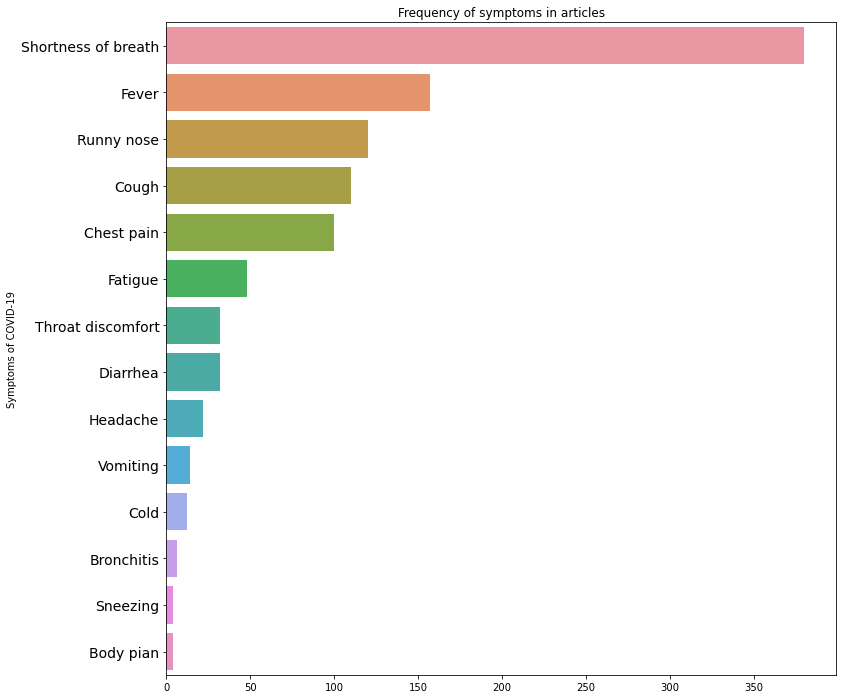

In [31]:
# Plotting the frequency of signs in articles
plt.figure(figsize=(12,12))
sums_of_symptoms= symptom_covid19.iloc[:, 1:].sum().sort_values(ascending=False)
sns.barplot(y=sums_of_symptoms.index, x=sums_of_symptoms,orient ='h')
# Custoizing the tickmarks on y axis
plt.yticks(fontsize=14)
# Setting the plot y label
plt.ylabel("Symptoms of COVID-19")
# Setting the plot title
plt.title("Frequency of symptoms in articles")
# Displaying the plot
plt.show()

The result of our analysis would show us that shortness of breath is the most commons sign of COVID-19. In addition, in about 150 articles mentioned Fever and Running nose as symptoms of this virus. Chest pain and coughing are among other important signs that people should be aware of. However, Let us look into the details of the whole data frame to see what are the most commons symptoms of the Coronavirus family. We need to have in mind that these are only the abstract and some articles might not write about the symptoms of the virus in the abstract. Thus, when we see these symptoms, we should be aware that they are quite serious symptoms.

In [32]:
coronavirus_family= counter(df,signs)
coronavirus_family.head() 

abstract  Cough  \
0  An emerging disease is one infectious epidemic...      0   
1  Deep sequencing of clinical samples is now an ...      0   
2  Developing methods to reconstruct transmission...      0   
3  The nasopharynx (NP) is reservoir for microbes...      0   
4  ABSTRACTIn 2013, U.S. swine producers were con...      0   

   Shortness of breath  Runny nose  Fever  Chest pain  Vomiting  Diarrhea  \
0                    0           0      0           0         0         0   
1                    0           0      0           0         0         0   
2                    0           0      0           0         0         0   
3                    0           0      0           0         0         0   
4                    0           0      0           0         0         0   

   Cold  Body pian  Sneezing  Headache  Fatigue  Throat discomfort  Bronchitis  
0     0          0         0         0        0                  0           0  
1     0          0         0         0        0                  0           0  
2     0          0         0         0        0                  0           0  
3     0          0         0         0        0                  0           0  
4     0          0         0         0        0                  0           0

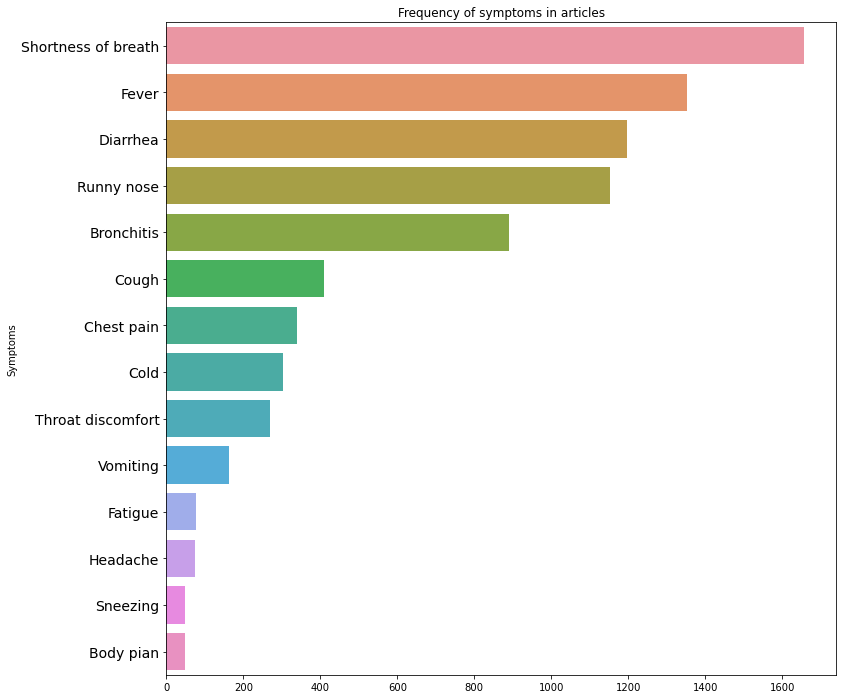

In [33]:
# Plotting the frequency of signs in articles
plt.figure(figsize=(12,12))
sums_of_symptoms= coronavirus_family.iloc[:, 1:].sum().sort_values(ascending=False)
sns.barplot(y=sums_of_symptoms.index, x=sums_of_symptoms,orient ='h')
# Custoizing the tickmarks on y axis
plt.yticks(fontsize=14)
# Setting the plot y label
plt.ylabel("Symptoms")
# Setting the plot title
plt.title("Frequency of symptoms in articles")
# Displaying the plot
plt.show()

In case of the whole data frame, we can see Coronavirus family have a common signs of shortness of breath. In addition, fever is one of the most repeated signs of this virus. Runny nose and Diarrhea are the other symptoms that we need to have in mind when dealing with this illness. However, we can see body pain, fatigue vomiting and headache are not mentioned repeatedly as signs of being infected. Although, as it was mentioned before, we need to have in mind that we are looking into the abstract, so this might not be quite accurate, but for the important symptoms, we can rely on them.

## 7. Who are the people most exposed to the virus?

We know that many people are exposed to the virus itself; however, some people are in more danger than others are. We want to take a look into different conditions that are in more risk than others. Thus, similar to what we did in the previous step, we are going to define dictionaries that would contain several severe sicknesses and different conditions. Then, by analyzing number of mentioned sicknesses, we can identify which individuals are more in danger.

In [34]:
conditions= {
                           
                            'Lung disease':['lung disease','asthma','chronic obstructive pulmonary disease',' copd ','chronic bronchitis','bronchitis','emphysema','lung cancer','pneumonia','pleural effusion'],
                            #'Obesity': ['obesity ', 'high bmi'],
                            'Old people': ['old people ', 'elderlies','elderly person','elderly','more than 65 years old'],
                            'Diabetes': ['diabetes','diabetic'],
                            'Heart disease':['heart disease','congenital heart disease','heart disease','arrhythmia','coronary artery disease','dilated cardiomyopathy','myocardial infarction','heart failure','mitral regurgitation'],
                            'Immunity':['Immunocompromised','wiscott-aldrich syndrome','wiscott aldrich','cevere combined immunodeficiency disease',' scid ','digeorge syndrome','ataxia-telangectasia','chronic granulomatous disease','transient hypogammaglobulinemia of infancy','agammaglobulinemia','complement deficiencies','hiv','aids','neutrophils','lymphocyte'],
                            'Kidney disease':['kidney disease','abdominal compartment syndrome','acetaminophen-induced nephrotoxicity','acute kidney failure','acute kidney injury','acute lobar nephronia','acute phosphate nephropathy','acute tubular necrosis','adenine phosphoribosyltransferase deficiency'],
                            'Liver disease':['alagille syndrome','alcohol-related liver disease','autoimmune hepatitis','benign liver tumors','biliary atresia','cirrhosis','galactosemia','liver disease'],


          }

In [35]:
dis= counter(df,conditions)
dis.head() 

abstract  Lung disease  \
0  An emerging disease is one infectious epidemic...             0   
1  Deep sequencing of clinical samples is now an ...             0   
2  Developing methods to reconstruct transmission...             0   
3  The nasopharynx (NP) is reservoir for microbes...             1   
4  ABSTRACTIn 2013, U.S. swine producers were con...             0   

   Old people  Diabetes  Heart disease  Immunity  Kidney disease  \
0           0         0              0         0               0   
1           0         0              0         0               0   
2           0         0              0         0               0   
3           0         0              0         0               0   
4           0         0              0         0               0   

   Liver disease  
0              0  
1              0  
2              0  
3              0  
4              0

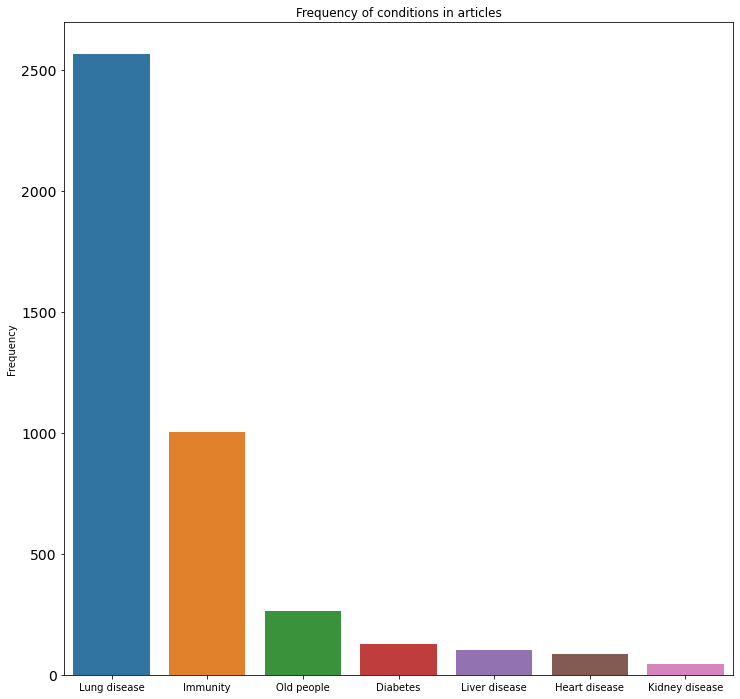

In [36]:
# Plotting the frequency of conditions in articles
plt.figure(figsize=(12,12))
sums_of_symptoms= dis.iloc[:, 1:].sum().sort_values(ascending=False)
sns.barplot(x=sums_of_symptoms.index, y=sums_of_symptoms,orient ='v')
# Custoizing the tickmarks on y axis
plt.yticks(fontsize=14)
# Setting the plot y label
plt.ylabel("Frequency")
# Setting the plot title
plt.title("Frequency of conditions in articles")
# Displaying the plot
plt.show()

The result of the above mentioned graph shows us that the people with lung diseases are most exposed to this virus and that can lead to serious conditions. Additionally, individuals who have an immunocompromised condition are the second group that are exposed to this virus family. Therefore, governments should implement enough measurement to address the issue for the people who have severe diseases especially people who have lung diseases, immunocompromised conditions and people with Diabetes and heart disease. Besides, we can see that old people are also in a danger since they are mentioned around 400 times in the articles. However, this is general in all of the coronavirus family, but we also need to look into the COVID-19 dataset.

In [37]:
dis_covid= counter(covid,conditions)
dis_covid.head() 

abstract  Lung disease  \
0  AbstractAs reported by the World Health Organi...             1   
1  AbstractDetailed genomic and structure-based a...             0   
2  AbstractThe recent outbreak of pneumonia in Wu...             1   
3  Since the SARS outbreak 18 years ago, large nu...             0   
4  AbstractOver the past 20 years, several corona...             0   

   Old people  Diabetes  Heart disease  Immunity  Kidney disease  \
0           0         0              0         0               0   
1           0         0              0         0               0   
2           0         0              0         0               0   
3           0         0              0         0               0   
4           0         0              0         0               0   

   Liver disease  
0              0  
1              0  
2              0  
3              0  
4              0

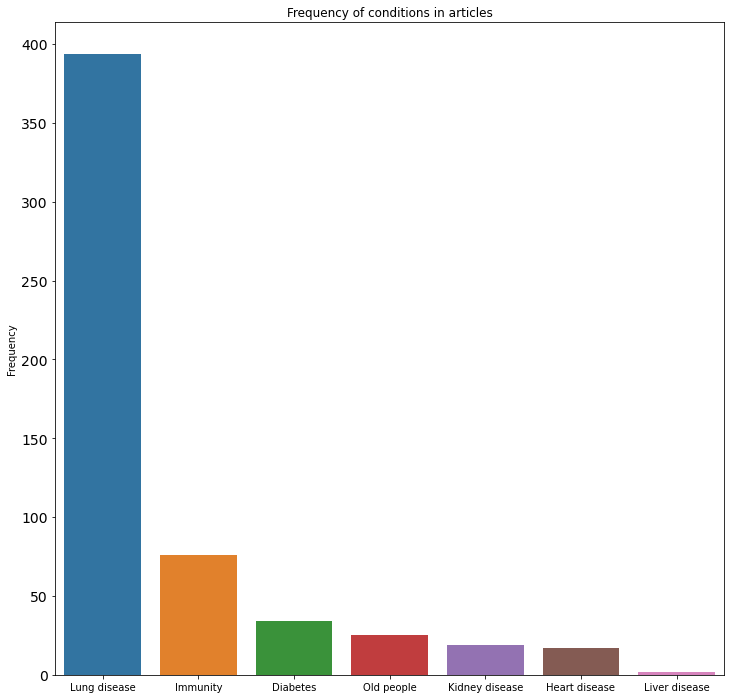

In [38]:
# Plotting the frequency of conditions in articles
plt.figure(figsize=(12,12))
sums_of_symptoms= dis_covid.iloc[:, 1:].sum().sort_values(ascending=False)
sns.barplot(x=sums_of_symptoms.index, y=sums_of_symptoms,orient ='v')
# Custoizing the tickmarks on y axis
plt.yticks(fontsize=14)
# Setting the plot y label
plt.ylabel("Frequency")
# Setting the plot title
plt.title("Frequency of conditions in articles")
# Displaying the plot
plt.show()

The result would indicate that people with lung diseases have the highest risk with this virus and liver diseases and people with liver disease are least mentioned in the articles. Diabetes is mentioned more than people with immunocompromised condition are. However, since the data set is not big enough, we need to be more cautious and have measurements to keep people with lung diseases, diabetes and immunocompromised conditions safe. The result seems to be consistent with what CDC is metioning. Similar to what we had in the previous part, elderly people are also exposed to this virus more than others.

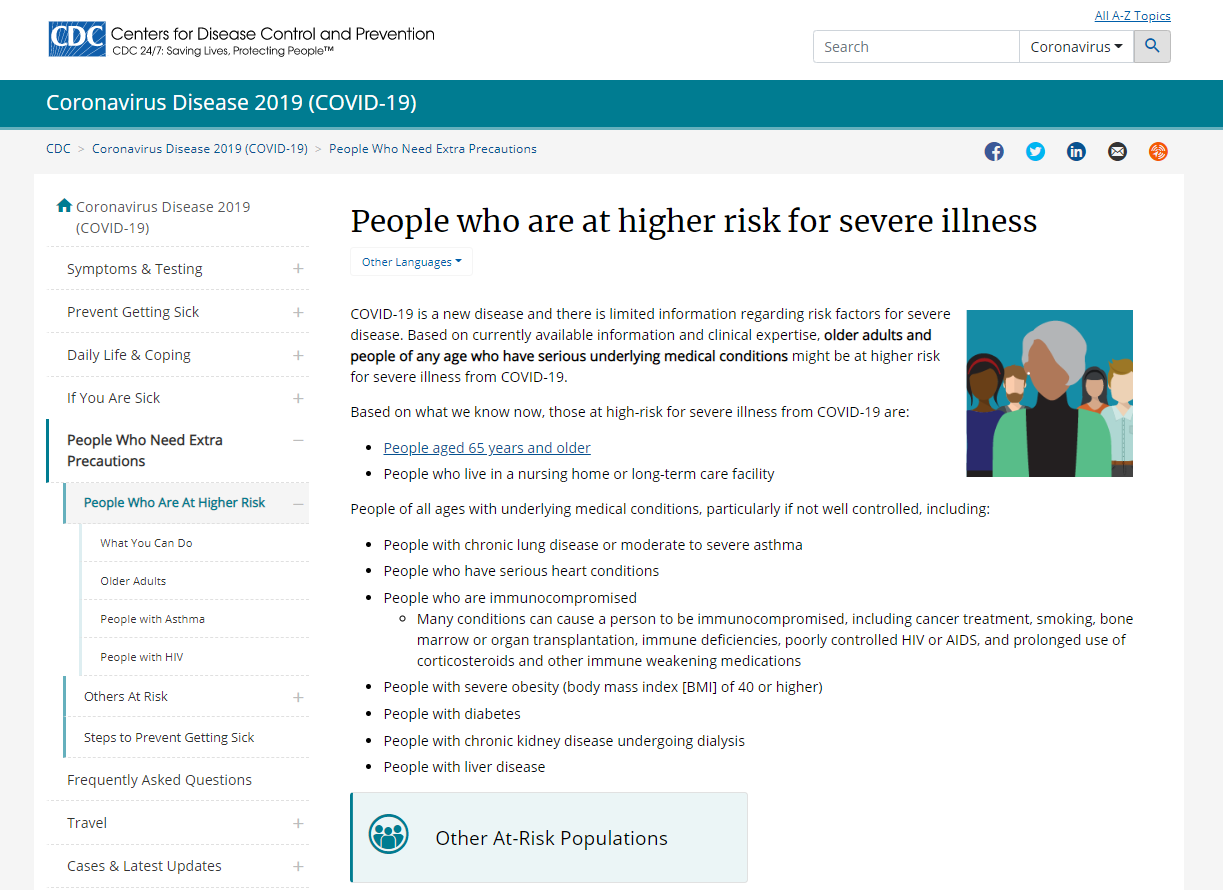

In [39]:
from IPython.display import Image
Image(filename='diseases.png')

## 8. Among the articles, what  are the most common practical measurment to control the virus?

We have decided to investigate the the measurements that articles suggest that would help reduction of virus spread. Similar to the last part, we are going to define a dictionary which contains keywords associated with each of the measurements. Then using the counter function to specify which one is more important and practical than others. We are going to look at the whole document. Nevertheless, there is a probability that small amount of articles are discussing the measurements.

In [40]:
Measurments= {
                           
                            'Social distancing':['social distancng','avoid mixture','social mixture','self isolation','remote working','remote schooling','remotely','self-separation','self separation','avoidance of crowded places','crowded place',' crowd ','social contact',' gathering ',' contact ',' closure ','physical distancing'],
                            'Quarantine': ['border closure','quarantine ', ' closure ', 'limit activity','limiting activity','limiting activities','school closure','university closure','class dismissal',' dismissal ', ' isolalation ','mitigation measure','self isolation','avoidance of crowded places','avoid mixture'],
                            'Hygiene': ['hygiene', 'hand wash',' sanitizer ','sanitize','cough etiquette','etiquette','respiratory etiquette',' mask ','face mask',' glove ','self monitoring','self-monitoring',' physical barrier ','wash',' soap ',' rinsing ',' alcohol-based ','alcohol based',' alcohol '],
                            'Travelling restriction':['airport','traveller','traveler',' risk countries','all countries','ban travel','travel ban','border closure','travel advisories'],
                            'Hospitalization':['hospitilize',' ventilator ',' ailing ',' confined ',' hospital for treatment'],
                            

          }

First, we are going to look the data set that only mentioned COVID-19 in their abstract. Therefore, we are sure that these measurments can be practical for the novel coronavirus.

In [41]:
measures_covid= counter(covid,Measurments)
measures_covid.head() 

abstract  Social distancing  \
0  AbstractAs reported by the World Health Organi...                  0   
1  AbstractDetailed genomic and structure-based a...                  0   
2  AbstractThe recent outbreak of pneumonia in Wu...                  0   
3  Since the SARS outbreak 18 years ago, large nu...                  0   
4  AbstractOver the past 20 years, several corona...                  0   

   Quarantine  Hygiene  Travelling restriction  Hospitalization  
0           0        0                       0                0  
1           0        0                       0                0  
2           0        0                       0                0  
3           0        0                       0                0  
4           0        0                       0                0

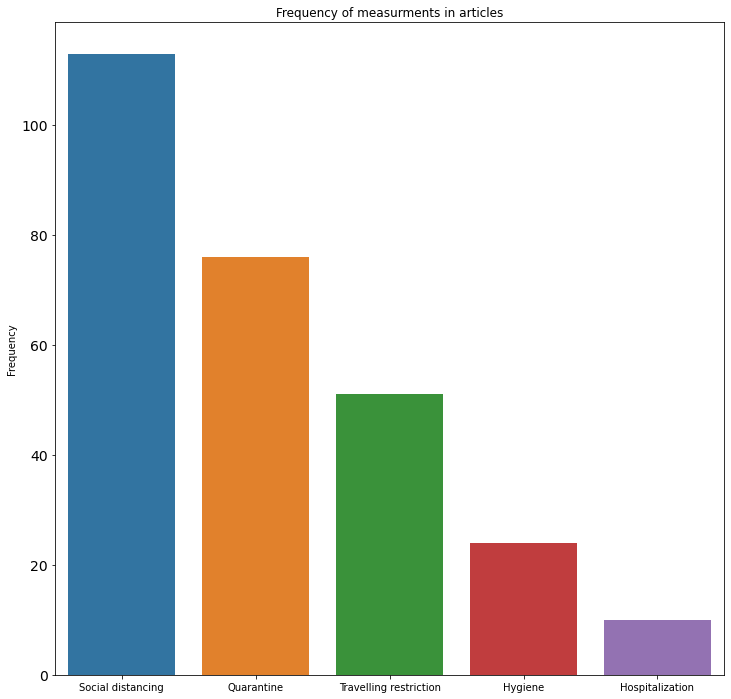

In [42]:
# Plotting the frequency of measurments
plt.figure(figsize=(12,12))
sums_of_symptoms= measures_covid.iloc[:, 1:].sum().sort_values(ascending=False)
sns.barplot(x=sums_of_symptoms.index, y=sums_of_symptoms,orient ='v')
# Custoizing the tickmarks on y axis
plt.yticks(fontsize=14)
# Setting the plot y label
plt.ylabel("Frequency")
# Setting the plot title
plt.title("Frequency of measurments in articles")
# Displaying the plot
plt.show()

The results, indicate that social distancing is the mentioned more than all the other factors. The result seems to be consistent with what WHO suggested. "Maintain at least 1 metre (3 feet) distance between yourself and anyone who is coughing or sneezing. Why? When someone coughs or sneezes they spray small liquid droplets from their nose or mouth which may contain virus. If you are too close, you can breathe in the droplets, including the COVID-19 virus if the person coughing has the disease"(who.int/emergencies/diseases/novel-coronavirus-2019/advice-for-public). In addition, based on Canada.ca : "Social distancing measures are approaches taken to minimize close contact with others in the community and include: quarantine and self-isolation at the individual level as well as other community based approaches (e.g. avoiding crowding, school measures and closures, workplace measures and closures, public/mass gathering cancellations)". Therefore, we can understand that it is a very practical measurement which would reduce the speed of spread. The next measurements that is mentioned more than others is travel restriction. Travel restriction can reduce number of infected cases that come to a specific country. With a small margin the third option is Quarantine. China started to take control of the pandemic by quarantining specific cities. Washing hands and hygienic suggestions are mentioned in the fourth place. However, hospitalization is not quite mentioned. This can be due to the fact that until a patient is not in a severe condition his/her immune system can treat the virus. However, if the person needs a ventilator it is not possible to treat him/her in their places.

We are going to select those article that talk about the transition of viruses (not only COVID-19) and investigate the measurements that would help to flatten the curve. The reason that we want to flat the curve is that if the demand for hospitals exceeds the capacity of hospitalization, the death rate would increase dramatically.

In [43]:
transmission = df[df['abstract'].str.contains("transmission") | df['abstract'].str.contains('spread')| df['abstract'].str.contains('contagious ')] 
transmission.shape

#Reindexing all the data set
transmission.index= [i for i in range(transmission.shape[0])]

In [44]:
measures= counter(transmission,Measurments)
measures.head() 

abstract  Social distancing  \
0  An emerging disease is one infectious epidemic...                  0   
1  Developing methods to reconstruct transmission...                  0   
2  The nasopharynx (NP) is reservoir for microbes...                  0   
3  ABSTRACTIn 2013, U.S. swine producers were con...                  0   
4  Macroscopic descriptions of populations common...                  1   

   Quarantine  Hygiene  Travelling restriction  Hospitalization  
0           0        0                       0                0  
1           0        0                       0                0  
2           0        0                       0                0  
3           0        0                       0                0  
4           0        0                       0                0

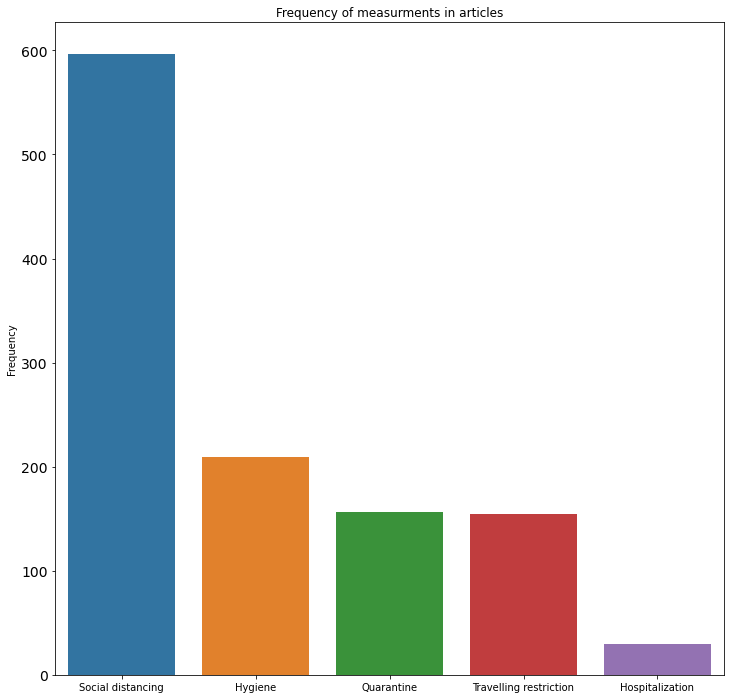

In [45]:
# Plotting the frequency of measurments
plt.figure(figsize=(12,12))
sums_of_symptoms= measures.iloc[:, 1:].sum().sort_values(ascending=False)
sns.barplot(x=sums_of_symptoms.index, y=sums_of_symptoms,orient ='v')
# Custoizing the tickmarks on y axis
plt.yticks(fontsize=14)
# Setting the plot y label
plt.ylabel("Frequency")
# Setting the plot title
plt.title("Frequency of measurments in articles")
# Displaying the plot
plt.show()

Articles that are specifically talked about transmission of virus in their abstract mention that social distancing and hygiene are among the most important factors to stop the contagious. Travel restriction advice and quarantine are among the next important factors that need to be considered. Having in mind aforementioned details, we can conclude that the most important factor to control the spread of virus is social distancing, meaning avoiding the crowd, remote working, etc. In addition, people should pay more attention to their hygiene and wash their hand more frequently. In the next stage, travel restrictions should be implemented to avoid spread of the virus. In the last stages, we have quarantining and hospitalization.

## 9. What is the frequency of keywords associated with COVID-19 abstract?

For the last part of exploratory analysis, we have decided to investigate the frequency of topics which are covered by the articles related to COVID-19. Similar to the previous parts, we are going to define a ditionary containing the keywords, and then use the counter function which was defined before for further analysis.

In [46]:
Topics= {
                           
                            'Prevention':['social distancng','avoid mixture','self isolation','physical distancing','vaccine','prevention','sanitizer',' soap '],
                            'Treatment': ['antiviral','hospitalization','medicine','treatment'],
                            'Mental health': ['mental','mental health', 'stress',' anxiety ',' depression '],
                            'Organs exposed':[' organs ',' lung ',' brain ',' liver ',' kidney ',' hear ',' bladder ','stomach','intestines','respiratory'],
                            'Public response':['public health',' public ',' hospitals ','organizations',' hospital for treatment'],
                            'Transmission':['transmission',' modeling ',' modelling ','spread','model','simulating','simulation'],    
                            'Body response':['lymphosite',' body response ',' white cell ','white','immune','host'],                            
                            'Virus structure':[' rna ',' dna ',' structure ',' cell ',' genome ','protein'],
                            'Clinical characteristics':['clinical characteristics',' clinical ',' symptom ',' cough ',' fever ','shortness of breath',' age ','gender',' sex ']
          }

In [47]:
topics= counter(covid,Topics)
topics.head() 

abstract  Prevention  Treatment  \
0  AbstractAs reported by the World Health Organi...           0          0   
1  AbstractDetailed genomic and structure-based a...           0          0   
2  AbstractThe recent outbreak of pneumonia in Wu...           1          0   
3  Since the SARS outbreak 18 years ago, large nu...           0          0   
4  AbstractOver the past 20 years, several corona...           0          0   

   Mental health  Organs exposed  Public response  Transmission  \
0              0               0                1             1   
1              0               0                1             0   
2              0               1                0             0   
3              0               1                0             0   
4              0               1                0             0   

   Body response  Virus structure  Clinical characteristics  
0              0                0                         0  
1              0                1                         0  
2              1                0                         0  
3              1                1                         0  
4              1                1                         0

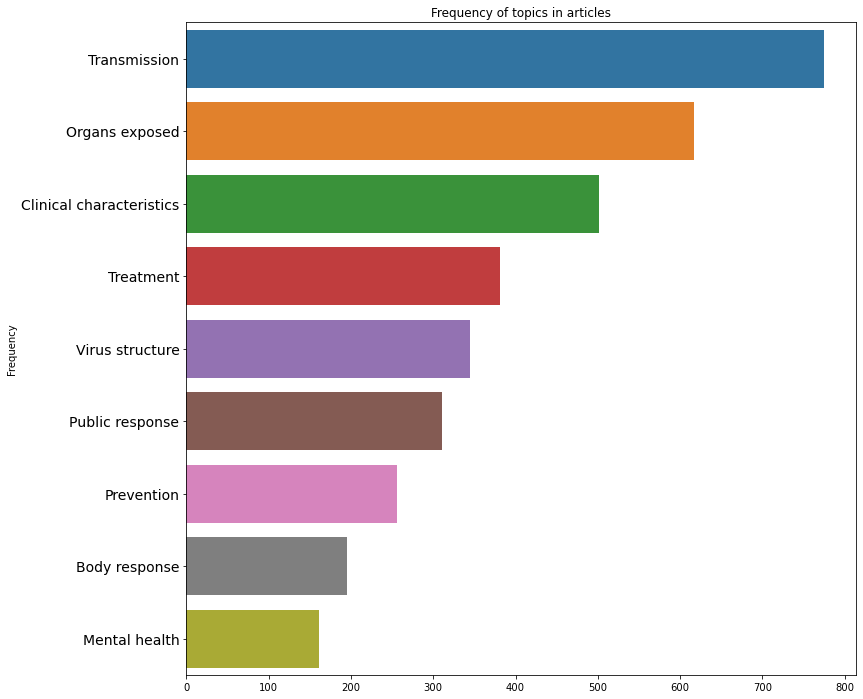

In [48]:
# Plotting the frequency of measurments
plt.figure(figsize=(12,12))
sums_of_symptoms= topics.iloc[:, 1:].sum().sort_values(ascending=False)
sns.barplot(y=sums_of_symptoms.index, x=sums_of_symptoms,orient ='h')
# Custoizing the tickmarks on y axis
plt.yticks(fontsize=14)
# Setting the plot y label
plt.ylabel("Frequency")
# Setting the plot title
plt.title("Frequency of topics in articles")
# Displaying the plot
plt.show()

As we can see from the table shown above, most of the articles are discussing the transmission of the virus which seems quite understandable. Since in the first stages of the virus, we need to have a better knowledge about its spread speed and how it would transmit from a person to another. In the second topic, it is essential to understand the infected organs for focusing on those organs to better understand the virus. The last topic which was least mentioned is mental health which seems unfortunate. Owing to the fact that during this stressful time more studies should focus on this topic. We are going to investigate the idea further in the result.

From the result of our analysis, we need to pre-process the text into a format that is readable by the computer. One of the method that can be used to processing the text is TF-IDF, which we will elaborate on in the next part. First, we need to clean the data which has been done in the first part of project. We have removed stop words, punctuations, and other characters that are not useful for our implementation. In the next part, we are going to used K-mean clustering and Hierarchical clustering in our models. 

## 3.Model selection and fitting to data

The aim for the third part of this project is to investigate unsupervised machine learning algorithms for recommendations that we are going to make. We are going to explore some question in this sections that are related to the previous parts. First of all, we know there is a huge demand for research in the field of Coronavirus nowadays. But, with the huge demand many researchers are working in this subject. Keeping up with the growing research about COVID-19, it will be very hard to work on the similar topics and use others knowledge for future works. Therefore, finding a good clustering approach would be very helpful for future researchers to categories all of the publications in the field of COVID-19. In addition, it would give us a good perspective about the research areas that are been done on this topic. Furthermore, we can discuss which one of these areas are worthwhile working on and each need more emphasize on them.
In this part, we are going to propose a couple of questions and use model implemenation to answer these crucial questions.

## What are the gaps in the researchs that have been done in the field of COVID-19?
* K-mean Clustering

For this part, first we need to work on the COVID-19 data set instead of the whole data frame. We have extracted a subset of the data set from the original data before. We have removed stopwords from the data frame and have tokenized them before. Now, we need to rejoin the whole list for further analysis. We are going to use k-means clustering in our modeling.

In [49]:
#Before getting to the next part, we are going to rebuild the tokenized sentences
def rejoin_words(row):
    my_list = row['text_cleaned']
    joined_words = ( " ".join(my_list))
    return joined_words

covid['text_cleaned'] = covid.apply(rejoin_words, axis=1)

After strutting the whole data frame, now we need to use TF-IDF victories for our analysis. TFIDF is a short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. Same as assignment 2, we are going to use TF-IDF victories in our modeling.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2**12)
X = vectorizer.fit_transform(covid['text_cleaned'].values)

In [51]:
X.shape
from sklearn.cluster import KMeans

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.
Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. We need to define a target number for k, which is a number of centroid that were asked in the data set.
Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.
In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid(https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1). For this project we have decided to use 3 clusters.


In [52]:
k = 3
kmeans = KMeans(n_clusters=k)
y = KMeans(n_clusters=k).fit(X)

labels = y.labels_
covid['labels'] = labels

Principal Component Analysis(PCA) is one of the most popular linear dimension reduction. Sometimes, it is used alone and sometimes as a starting solution for other dimension reduction methods. PCA is a projection based method which transforms the data by projecting it onto a set of orthogonal axes(https://blog.paperspace.com/dimension-reduction-with-principal-component-analysis/). But, why do we need PCA for dimensionaliy reduction? After each data point is assigned a cluster, the next natural step is to visualize it. But there is a problem. The data we have has over 100 columns. We will need to reduce the number of columns to at most 3 to visualize it.

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)             # to obtain the first 20 principal components
                                      # why 20? because the results were better using 20 principal components!
pca_result = pca.fit_transform(X.toarray())

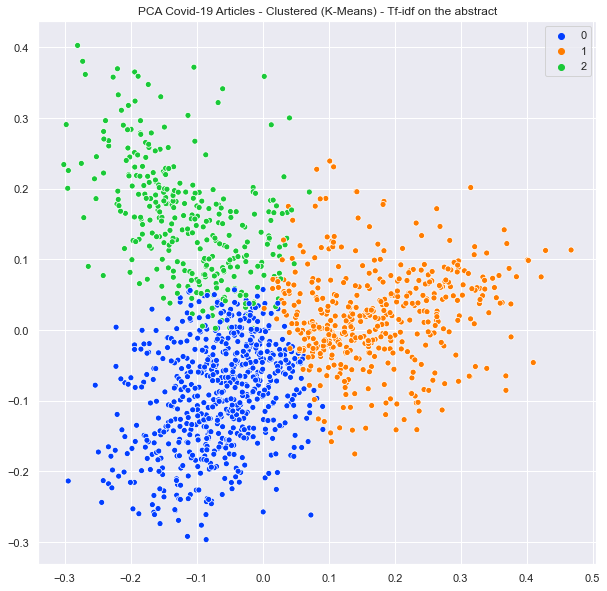

In [54]:
# sns settings
kmeans = KMeans(n_clusters=3)
sns.set(rc={'figure.figsize':(10,10)})
y=kmeans.fit_predict(X)
# colors
palette = sns.color_palette("bright", len(set(y)))

# plot
sns.scatterplot(pca_result[:,0], pca_result[:,1], hue=y, legend='full', palette=palette)
plt.title("PCA Covid-19 Articles - Clustered (K-Means) - Tf-idf on the abstract")
# plt.savefig("plots/pca_covid19_label_TFID.png")
plt.show()

The result of the graph looks pretty promising. We can see that points within each cluster are near each other. However, we can also observe some overlapping. In order to reduce these overlapping we can increase the number of clusters or use another methods for vectoring the sentences. Methods such as HashVectorizer. In addition, we can use different clustering algorithms too. One of the main questions that we need to ask in the concept of COVID-19, what are the gaps in the researchs that we are not aware of. Therefore, after clustering COVID-19 data set, we need to look into the keywords associated with each title to better understand the concepts that are being investigated by the scholars.
before getting to the, we want to perform a wordcloud on each label to see what is the topic that they are working on for this part, we are going to work on the titles.

In [55]:
#extracing the data frame in case of change in rerun
#covid.to_csv('covid_labels.csv')

In [56]:
covid_labels=pd.read_csv('covid_labels.csv')

In [57]:
# Removing single characters in the abstract
covid_labels['title']= covid['title'].apply(lambda text: re.sub(r'\s+[a-zA-Z]\s+', ' ', text))
# Substituting multiple spaces with single space
covid_labels['title']= covid['title'].apply(lambda text: re.sub(r'\s+', ' ', text, flags=re.I))
# Remove spaces \n
covid_labels['title']= covid['title'].apply(lambda text: re.sub(r'\\n+', ' ', text, flags=re.I))

In [58]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tokenized_title = covid_labels['title'].apply(lambda x: tokenization(x.lower()))

In [59]:
# remove stop words
def remove_stopwords(text):
    modified_word_list=[word for word in text if word not in stop_words_list]
    return modified_word_list

covid_labels['title_cleaned']=tokenized_title.apply(remove_stopwords)

In [60]:
covid_labels.head()

Unnamed: 0                                              title  \
0           0  A mathematical model for simulating the transm...   
1           1  Genomic and protein structure modelling analys...   
2           2  Host and infectivity prediction of Wuhan 2019 ...   
3           3  Discovery of a novel coronavirus associated wi...   
4           4  Functional assessment of cell entry and recept...   

                         doi  \
0  10.1101/2020.01.19.911669   
1  10.1101/2020.01.20.913368   
2  10.1101/2020.01.21.914044   
3  10.1101/2020.01.22.914952   
4  10.1101/2020.01.22.915660   

                                            abstract publish_time  \
0  AbstractAs reported by the World Health Organi...   2020-01-19   
1  AbstractDetailed genomic and structure-based a...   2020-01-21   
2  AbstractThe recent outbreak of pneumonia in Wu...   2020-01-24   
3  Since the SARS outbreak 18 years ago, large nu...   2020-01-23   
4  AbstractOver the past 20 years, several corona...   2020-01-22   

                                             authors  \
0  Tianmu Chen; Jia Rui; Qiupeng Wang; Zeyu Zhao;...   
1  Ning Dong; Xuemei Yang; Lianwei Ye; Kaichao Ch...   
2  Qian Guo; Mo Li; Chunhui Wang; Peihong Wang; Z...   
3  Peng Zhou; Xing-Lou Yang; Xian-Guang Wang; Ben...   
4                     Michael Letko; Vincent Munster   

                                        text_cleaned  labels  \
0  abstractas reported health organization novel ...       0   
1  abstractdetailed genomic structure based analy...       2   
2  abstractthe outbreak pneumonia wuhan china cau...       2   
3  sars outbreak 18 years ago large number severe...       2   
4  abstractover 20 years coronaviruses crossed sp...       2   

                                       title_cleaned  
0  [mathematical, model, simulating, transmission...  
1  [genomic, protein, structure, modelling, analy...  
2  [host, infectivity, prediction, wuhan, 2019, n...  
3  [discovery, novel, coronavirus, associated, pn...  
4  [functional, assessment, cell, entry, receptor...

In [61]:
#removing general terms associated with the covid-19, so we only focus on the terms that are unique in each cluster. 
#with iteration, we would remove words that are not specific in each topic
#for instance we know the term covid would be repeated in each of the titles in all of the clusters since the data set
#is related to covid virus
for ind in covid_labels.index: 
    covid_labels['title_cleaned'][ind]=[e for e in covid_labels['title_cleaned'][ind] if e not in ('covid', 'novel','sars','mers','human','coronavirus','china','wuhan','early','outbreak','ncov','cov','corona','coronaviruses','patients','patient','evaluation','analysis','emerge','emerging')]

In [62]:
#Before getting to the next part, we are going to rebuild the tokenized sentences
def rejoin_words(row):
    my_list = row['title_cleaned']
    joined_words = ( " ".join(my_list))
    return joined_words

covid_labels['title_cleaned'] = covid_labels.apply(rejoin_words, axis=1)

In the following cell, we are going to find a subset of each cluster that is related to each label.

In [63]:
cluster_0 = covid_labels.loc[covid_labels['labels']==0]
cluster_1 = covid_labels.loc[covid_labels['labels']==1]
cluster_2 = covid_labels.loc[covid_labels['labels']==2]

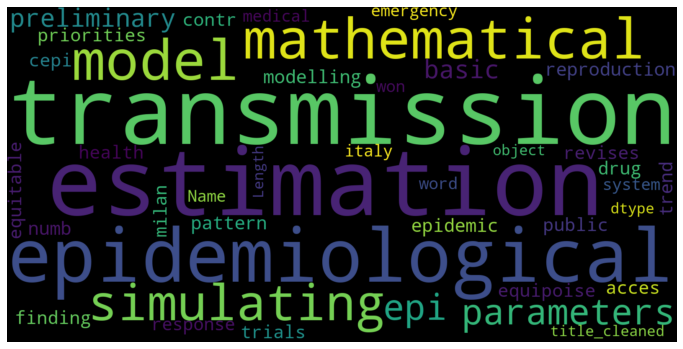

In [64]:
from wordcloud import WordCloud
text = str(cluster_0['title_cleaned'])
wordcloud = WordCloud(width = 1600,height = 800, max_font_size  = 400).generate(text)
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can see from the result of the wordcloud, these authors of this clusters are manly working on mathematical simulation of the novel coronavirus. Some works have been done on the transmission modelling of the coronavirus. Trends and other aspects of the epidemic have been studied in this cluster but mainly authors are working on the mathematical modeling and transmission of the virus. Since there are other bold words such as public and health, we can interpret that this cluster is mainly focused on the response of the public health organizatioons and the public to the effects of this virus. Epidemiology is the study and analysis of the distribution (who, when, and where), patterns and determinants of health and disease conditions in defined populations. Therefore, we name this cluster : Transmission modeling and epidemiological studies.

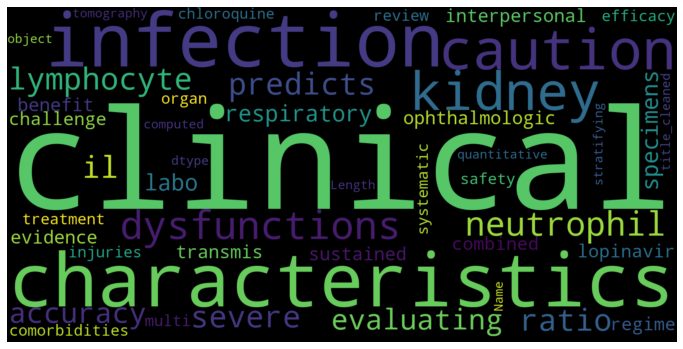

In [65]:
from wordcloud import WordCloud
text = str(cluster_1['title_cleaned'])
wordcloud = WordCloud(width = 1600,height = 800, max_font_size  = 400).generate(text)
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In the second cluster, the most repeated words are patient and clinical. This can be interpreted as the authors from this cluster are mainly working on detecting the symptoms of this virus. Articles are working on the person criteria may include age, gender, and clinical characteristics such as symptoms (e.g. cough and fever) and the results of clinical tests. For example, this article is discussing "Clinical characteristics of 51 patients discharged from hospital with COVID-19". In addition, some works has been done on the effects of the virus on the kidney. Neutrophils make up the majority of circulating white blood cells and serve as the primary defense against infections by destroying bacteria, bacterial fragments and immunoglobulin-bound viruses in the blood. In addition, words such as infection and lymphocyte are repeated in this cluster which indicate the authors of this cluster are working on the immune system response to the virus. Hence we name this cluster : study of patients' characteristics and immun system response.

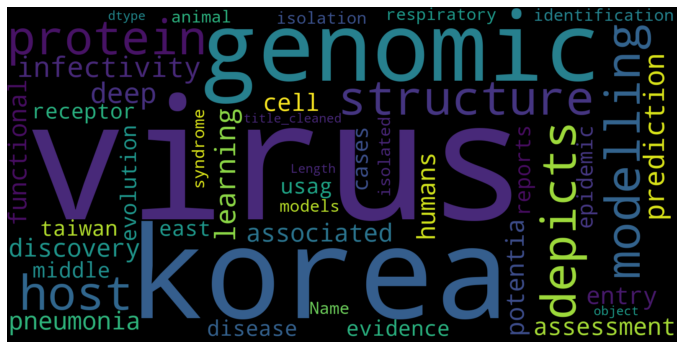

In [66]:
from wordcloud import WordCloud
text = str(cluster_2['title_cleaned'])
wordcloud = WordCloud(width = 1600,height = 800, max_font_size  = 400).generate(text)
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The third type of articles are mainly discussing the structure of the virus and how it affects the host. From the wordcloud we can see most of the repeated words such as protein, genome and structure all directing to the point that authors of this cluster mainly working on the structure of the virus. An example of the tile from this cluster would be: "Genome Detective Coronavirus Typing Tool for rapid identification and characterization of novel coronavirus genomes". Some deep learning algorithm are used in this section for virus assessments. Moreover, some works has been done on the respiratory systems and pneumonia which makes sense since this virus would attack respiratory systems in human body such as lungs. Therefore, the last cluser would be named as : Virus structure identification and modelig.

From the result of the clusters we can see that what are the main topics that researchers are now working on. For instance, now we know some researchers are working on the characteristics of the patients that are infected to the virus. These articles would help us understand what type of people would response worse than others to the virus. Moreover, we can understand that what are the characteristics that we need to ask the suspicious cases in order to reduce the risk of fatality. A great number of researches are dedicated to the Structure of the virus. From these publications, we can easily understand what can be done to create a vaccine or a medicine to reduce the speed of spread within the body of patients. Some of the articles are working on the response of the public health and hospitals to the pandemic. Other articles are working on the mathematical modeling of the coronavirus in different areas. However, some of the most important aspects of COVID-19 are not considered in the researches. Aspects such as the effects of COVID-19 on public mental health and overall mental issues associated with the virus. To be more specific, we know that COVID-19 is the hottest topic nowadays for media. And people are exposed to negative news of the virus. Some people lost their job since many businesses shut down their services. Some people might not have enough knowledge about the virus and think if they get infected, they are most likely to have severe conditions. This would be frightening for people and would affect their mental health. In the conclusion part, we are going to discuss this matter more in detail.

## Which people are more exposed to the virus?
* Hierarchical Clustering

In the analysis part, we discussed which type of people are more exposed to the virus. However, we need more investigation to understand which type of individuals with what characteristics are more in danger. This would give us some insights about the hospitalization and other societal policies. From the previous analysis, we understood that people with lung diseases are more exposed to the virus. After clustering with k-mean method, we realized that one of the main topics that fifth cluster is working on is human respiratory system. Therefore, we can use this as a benchmark to identify the next cases which are exposed to the virus. Moreover, we might be able to provide some hypothesis about the problem associated with each group of people.

*But why using Hierarchical Clustering?*

'Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. In some cases the result of hierarchical and K-Means clustering can be similar. Before implementing hierarchical clustering using Scikit-Learn, let's first understand the theory behind hierarchical clustering. There are two types of hierarchical clustering: Agglomerative and Divisive. In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters (source: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn, Accessed: 29 March 2019)'

In this project, we have used cosine similarity. 'Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity' (source: https://www.machinelearningplus.com/nlp/cosine-similarity/, Accessed: 29 March 2019).
We can now see how different sub-clusters relate to each other, and how far apart data points are. With this technique, we will be able to see at each level which type of people are more in danger than others.

In [67]:
# Defining a function to cluster the skills (Hierarchical clustering)
def Hierarchical_clustering(df,dictionary,DS):
    # Stroing the keys of the dictionary as list
    dic = list(dictionary.keys())
    # Storing the lenght of the dataframe
    n_data = len(df)

    # distance_matrix = np.zeros(shape = (n_data, len(skillsList)))
    distance_matrix = np.zeros(shape = (len(dic),n_data))

    # calculating the distance matrix
    for i in range(0, n_data):
        for j in range(0,len(dic)):
            distance_matrix[j][i] = df[dic[j]][i]

    dist = 1 - cosine_similarity(distance_matrix)


    linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

    # Plotting the outcome
    fig, ax = plt.subplots(figsize=(5, 8)) # set size
    ax = dendrogram(linkage_matrix, orientation="right", labels=dic,p=40,truncate_mode='level');
    plt.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    # Customizing the tickmarks on the y label
    plt.yticks(fontsize=14)
    plt.tight_layout() #show plot with tight layout


In the previous step, we have defined a dictionary which would allow us to look for the frequency of the each condition in the document that we are exploring. Therefore, we are going to use the same dictionary to find a clustering and similarity between each condition. For this part, we are going to look into both data set (Only COIVD-19 and all the coronaviruses family)

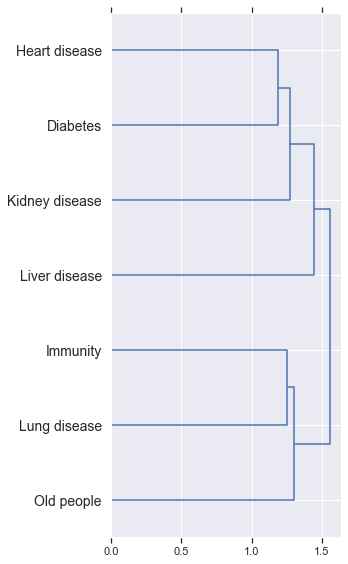

In [68]:
# Applying the defined fucntion to the dataframe and the dictionary 
Hierarchical_clustering(dis,conditions,True)

From the clustering, we can easily interpret that people with immunity problem and lung diseases are most in danger of this virus. In the second layer of the cluster we see that elderly individuals are among the people that are more exposed to the virus. Heart disease, diabetes, kidney disease, obesity and liver diseases are not in danger like the first group of cluster. Individuals with kidney diseases and liver diseases are among the last people who are exposed to the virus in the conditions we defined. However, this is only for the whole coronavirus family. We need to be more specific to COVID-19 cases for understanding the issues associated with this virus.

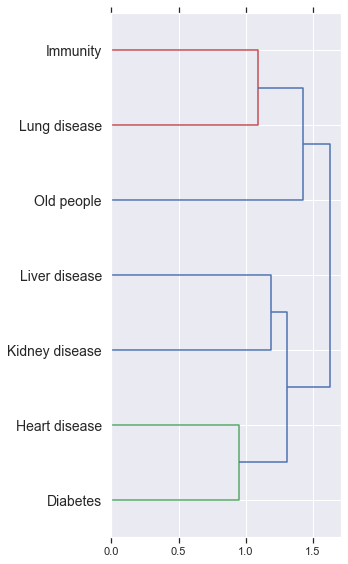

In [69]:
# Applying the defined fucntion to the dataframe and the dictionary 
Hierarchical_clustering(dis_covid,conditions,True)

It is interesting to see that we have similar cluster with small difference in the lower part of the cluster. Still people with lung diseases and immunity issues are more exposed to COVID-19. In the second layer, old people are among the individuals who are the most exposed. This would give us some useful insights about the policies that we are going to discuss in the discussion section. The reason we only focused on these 7 groups of people is that these are the most important characteristics that might be lead to fatality of the patient.

In the following part, we are going to take a deeper look into the symptoms of patients in the case of COVID-19. There are some symptoms which are quite common in most cases, however, there some other symptoms that we do not see regularly in the case of COVID-19. In addition, by comparing symptoms of COVID-19 with other coronaviruses, we can have some insights about the differences of this virus family.

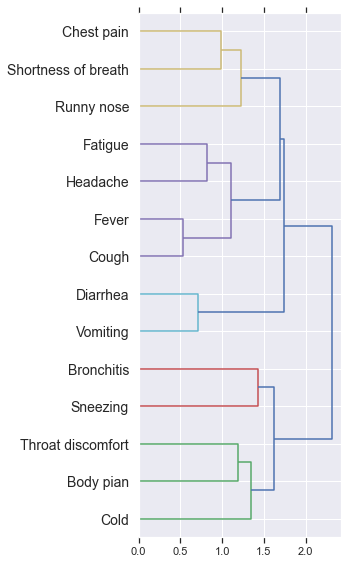

In [70]:
# Applying the defined fucntion to the dataframe and the dictionary Case of COVID-19
Hierarchical_clustering(symptom_covid19,signs,True)

From the analtsis, we knew that shotness of breath is the commons sign of the virus which starts to happen in the critcal stages of the virus. From the clustering, we can see that runny nose is also another symptom that seems to start in the middle part of the infection. The first stage would start we cough and fever then headache and fatigue will start to appear. The lower part of the tree would show some uncommon symptoms of the virus. Vomiting and Diarrhea is more come than other symptoms such as Sneezing or throat discomfort. Feeling cold does not have anything to do with the COVID-19. Body pain and throat discomfort is more likely to start together. But they are to quite related to the COVID-19. Let's take a look into the genera coronavirus family.


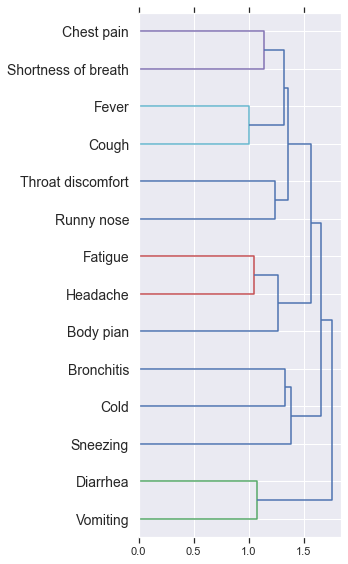

In [71]:
# Applying the defined fucntion to the dataframe and the dictionary Case of COVID-19
Hierarchical_clustering(coronavirus_family,signs,True)

We can see some similarity and some differences in case of coronavirus family. In the case of coronavirus family Diarrhea and vomiting are the least symptoms. Chest pain and shortness of breath is similar to COVID-19 would happen together. In addition, fever and coughing would start together. In contrast to COVID-19, throat discomfort and runny noise is more likely to be the common symptoms of coronavirus family. In the next layer, we can see fatigue and headache would start to happen together as in case of coronavirus family. However, in case of COVID-19, these symptoms we among the uncommon symptoms. We can see that body pain is also one of the symptoms that have closer distance to the most common symptoms of coronavirus family. Similarly feeling chili is not a common symptom for the virus. From the result of these two different clustering, we can interpret that some symptoms are more likely to happen in all the coronaviruses and some are least likely to be related to the virus. Therefore, to be more cautious, we need to implement measurements to control people with symptoms that are common in both clusters. Symptoms such as chest pain, shortness of breath, fever and cough. However, since COVID-19 is a virus from the coronavirus family, we need to consider headache and fatigue as other symptoms that some people might not mention when they are visiting a doctor. So, the test should include these symptoms. Vomiting and diarrhea should be considered as some signs of COVID-19. Sneezing and feeling cold is not a general symptom of coronavirus family, so we can drop them from out tests.

The last modeling that we want to investigate is the hierarchical clustering for the topic. This would give us good insights about the relationship of each topics and we can understand which topics have lower distance. This would be helpful for future research. Due to the fact that for further investigation, new scholars would understand which topics should they have in mind when they are considering starting research in the field of COVID-19.

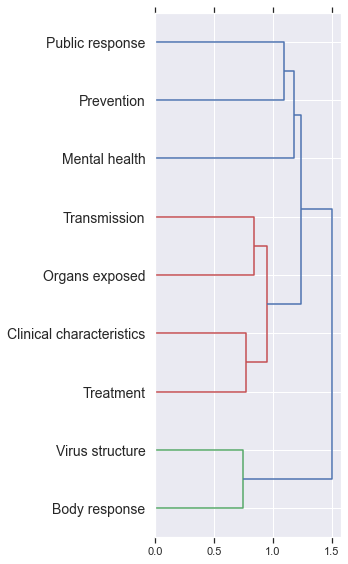

In [72]:
# Applying the defined fucntion to the dataframe and the dictionary Case of COVID-19
Hierarchical_clustering(topics,Topics,True)

The result of the clustering seems to be somehow logical. Public response has a close relation with prevention, which seems to be understandable. We know that for instance, social distancing has a great impact on the public response because many of the business are going to be shut down. Moreover, the prevention happens to flatten the curve associated with infected cases so that it would not exceed the capacity of public health organizations and hospitals. clinical characteristics is related to the treatments which are being tested on the virus. This is owing to the fact that we need to undestand what are the symptoms to better understand which part of the body needs to be aimed. Body response and virus structre also have close relation. Based on the virus structure the body start to response to the virus. When the COVID-19 virus attacks, it turns the patient's own cells into virus factories. It starts at the surface of the cell, when the virus latches on to a protein that normally helps regulate the patient's blood pressure. The cell unwittingly brings the virus inside, where the attacker unloads its cargo: instructions for making more virus.Having no equipment of its own, the virus commandeers the cell's machinery to make copies of its genetic code, manufacture more virus shells and deliver packaged germs to the cell surface, where they go on to infect more cells(https://www.voanews.com/science-health/coronavirus-outbreak/when-covid-19-attacks-patients-cells-turn-virus-factories). By studying the structure of the virus we can better identify body's response to thevirus. It is iteresting to note that mental health has a closer relationship than others to prevention and public response. This is quite logical since, when businesses shut down for social distancing for instance, there are alot of stress and anxiety associated with this decision that would affect the people exposed to the situation.

## 4.Results and discussion
In this project, we aimed to answer some critical questions that would help us to better understand the effects of COVID-19 and how would be able to combat this virus. The two main questions that we wanted to address in this project were :

*1) Which countries were affected the most by this virus and based on the articles what would be the reason associated with it(what type of people are the most exposed to the virus)? Now how can we implement several measurements to reduce the number of cases and flatten the curve?*

*2) Analyzing different aspects of COVID-19 based on the metadata articles, what are the gaps that we need to consider in our analysis and what actions do you suggest for helping the issue?*

In addition some minor questions were asked within the project that we tried to address them by analyzing different data frames. For instance, one of the frequently asked questions that people have is that does the spread speed reduce during the summer or not? By analyzing the average temperature through the whole world, we understood southern hemisphere countries such as Australia which now experiencing their summer, have the similar transmission spread for this pandemic. Thus, we cannot accept the hypothesis that summer would help to reduce the spread of spread. We have taken a look into the data frame from different countries and what would be number of confirmed cases, fatalities, and recovered cases. We were able to find the death rate associated with the virus and now, we know that in some countries number of confirmed cases are exceeding the capacity of hospitals. Hence, people with severe conditions would not have access to ventilator and other means which are vital for their health. Among the countries, some countries such as South Korea were able to handle the situation much better than other. We were able to find a data set which included the actions each country made in different stages of the virus. Word cloud helped us to understand the reason that South Korea were able to overcome the issue better than others was that they have shut down social places such schools and universities at an early stage of the virus. In addition, they have limited the social gathering such as religious gathering which would be the best place to spread the virus. In addition, very soon the have quarantined the cities and shut down international flights from abroad. All of these actions led to the death rate of 1.7 percent. On the other hand, as we said, death rate in the world is about 6 percent. Some countries have much higher figures and some have lower. We looked into the symptoms which were mentioned in the articles. Defining some dictionaries and a counter function, we were able to capture the common and un commons symptoms of the virus. We performed the procedure on two different subset of data. The first one included all the coronavirus family and the second one was only focused on the COVID-19 articles. The result would indicate that chest pain and shortness of breath were among the common symptoms that would show up in later stages of the infection. Unlike what we had in case of coronavirus family, vomiting and diarrhea are among the symptoms for COVID-19. Similarly the whole coronavirus family would have cough and fever as their common symptoms. We have suggestion about the testing of the virus based on these signs. If we have a data set which include multiple symptoms (common and uncommon), we can assign each of them with weight and based on a machine learning classifier, we can design a web page that asks for all of these symptoms from the respondent and based on the answers, we can indetify whether the person is suspicious to the virus or not. However, for this suggestion we need access to the other patients history to develop a machine learning algorithm.  

Now let's work on the main question which were asked in this project.


### *1) Which countries were affected the most by this virus and based on the articles what would be the reason associated with it(what type of people are the most exposed to the virus)? Now how can we implement several measurements to reduce the number of cases and flatten the curve?*

To address this question, first we needed to identify the global statistics of the pandemic and number of cases in each country. Look into the death rate, then going to the articles and based on the dictionary defined find out which type of people are more exposed to the virus. Then go back again to the countries and understand the characteristics of each country wich made them susceptible to the virus. After analysis, then we can recommend government how they can address the issue and reduce number of infected individuals and death rate. Thus, based on the data set WHO provided and would be updated day by day, we can understand that European countries were among the most impacted countries. There are a couple of obvious reasons associated with this matter. Considering number of confirmed cases, we can say that since European countries have open borders within the Europe, they are not implementing measurements such as other countries when foreigners enter. They are very close to each other so for many of the trips travelers do not need to use airplanes. Therefore, the security of the airport is not considered in bus terminals of trains. Tourists were not checked with health conditions. Therefore, many infected people enter this region. Based on the virus feature, many people who carry the virus do not know about the matter. So, the first step needed to be closure of borders. As we saw in case of articles, travel restrictions, quarantine and social distancing would be the best measurements to control the spread of virus. In addition, as we saw in case of South Korea, one of the major reasons that they were able to control the spread was suspending the airports. In the next stage of our investigation, we have implemented methods to investigate people characteristics that are more exposed to the virus based on the metadata articles. The result indicated that people with lung diseases such as asthma are most susceptible to the virus. In addition people with immune problems and old people are among the next victims of the virus. Moreover, there were some research associated with diabetes problems and the exposure to the virus. Based on the analysis for European countries we understood they have higher average age than other countries which is one of the reason that they have higher death rate than others. We pushed our investigation further and by the help of unsupervised machine learning algorithm (Hierarchal clustering). We realized that the after people with lung diseases, immunocompromised individuals and old people are more in danger of the virus. This can create some opportunities for further research to understand the relation between old people and immunity problems. Based on the previous research we can understand aging would reduce the immunity of the body. Therefore, this is one of the main reasons that old people should be considered seriously in the globe specially in the countries such as European countries which have higher average age. Now, we reach the part that we want to make suggestion to the countries to control the virus. First and foremost, based on the patients histories, countries should identify people with highest risk of the virus. For their hospitalization we need to consider special measurements. For instance, during this time we need to consider of an old man needs to be hospitalized, he should be hospitalized in an isolated room. Government can go further and if it's possible do the treatment in the residence of the old man. Now, we know there might be a relation between immune system and aging; we can develop special treatment during this time to boost elderly people's immune system to help the body defend against the virus. The last recommendation would be that governments should provide elderly people, immunocompromised cases and people with lung diseases with their basic needs such groceries to prevent them from exiting their houses. This would increase social distancing which is the best measurement to control the virus. In addition, countries should provide people with such conditions with a wage that would prevent them from working outside their places. The best possible way to reduce the death rate in the susceptible people is to prevent them from infection to the virus. We need to keep these people in the houses and keep their distance from other cases. During this time, researchers would be able to provide the vaccine and antiviral for the virus to keep these individual safe. The result of the analysis of virus would show that healthy young generation's body react to the virus as a flu and since they do not not have immune issues they can defeat the virus. But until the time scientists find a definite way to uproot the virus, governments need to keep people with certain condition safe. These people as we discussed before are older generation, people with lung diseases, immunocompromised cases such as people with HIV. Government need to put these people in the priority of hospitals and social assistance. Government can enforce tickets to necessary trips to prevent people from exiting their houses.
Furthermore, since we know lung disease is one of the main reason that would led to fatality, and also we know smoking would have severe impact on the lung, governments can stop celling cigarettes for certain amount of time until the issues disappears.


### *2) Analyzing different aspects of COVID-19 based on the metadata articles, what are the gaps that we need to consider in our analysis and what actions do you suggest for helping the issue?*

The second question that we aimed to answer is that what are the most frequent topics that are covered by scholars in the case of COVID-19 and what aspect of this virus is not investigated thoroughly. For this question first we did an exploratory analysis on the abstract of COVID-19 data set. We defined a dictionary containing keywords associated with each topic and based on the counter function which was developed in the previous step, we counted the topics. Based on the analysis, we realized that most of the articles are discussing how the virus would spread and they are working on the modelling of the virus. In addition, the second most popular topic is organs which are attacked by the virus such as lung, brain, etc. Clinical characteristics of the patients which would be related to the symptoms are the third popular subject. Treatment, virus structure, public response, prevention, body response are located in the next positions. However, the least covered topic is related to mental health associated with the virus. After the analysis, we performed two type of clustering on the data set. First one is K-mean with 3 clusters. We divided the whole data set to three sub set of similar topics. The first cluster is working on Transmission modeling and epidemiological studies. The second is working on study of patients' characteristics and immune system response which is related to body response. and the last cluster considers Virus structure identification and modeling. Based on the titles, we easily see that mental health is not considered in any of the topic thoroughly. Although, it is essential to investigate this matter deeper due to its serious consequences. After the quarantine and closure of businesses many people were fired temporarily from their jobs. They did not receive any payments from their organizations therefore, it created a very difficult condition for them. However, it was necessary for them to pay their rents and for their basic needs such groceries. The result of this situation would be anxiety and stress. Since we can predict the time that the pandemic disappears the problem gets bigger and bigger. Some countries such US and Canada decided to pay weekly payments to their citizens who were out of business due to the crisis. However, there are many countries that not taking the same action. These governments might not take this problem serious. The result would be people start going outside because of this issues and anxiety problems to find jobs without considering the effects of their action. Social distancing would not be implemented correctly and the result would be severe. These researches would encourage governments to pay attention to the people who lost their jobs. This gap is not only considered for healthy people. With the media coverage and negative news all around the world, when people get infected this would created a stressful condition for them. The anxiety and stress associated with the virus would have dangerous impacts on the patients. Therefore, it is essential to work on this matter to find solutions to address the mental health associated with the pandemic. In the second model, we developed a hierarchical clustering which would help future scholars to understand the relation of topics with each other. One of the interesting insights was that public response and prevention, which include social distancing had a close relation with each other. In the second layer they had a close distance to mental health which made sense. From the virus structure, researchers are able to find the body response to the virus. Therefore, researchers do not need to waste time on unrelated topics. In order to reduce the impact of the virus, researches need to understand the clinical characteristics of the patient. Is he/she coughing, does she/he have fever, etc. Therefore, they would know which medicine they need to try on the patients to see an impact on the virus. To put all in a nutshell, we can understand that mental health is a gap in the research and from the clustering we can see that it has a close relation to prevention of the virus and public response to the virus. This would make it very critical to investigate. Thus, it needs to be taken seriously and works should be done in this context.